In [104]:
import pyusbus as usbProbe

import pandas as pd
import numpy as np
import struct

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("pyubus version:",usbProbe.__version__)

pyubus version: 0.0.1


In [2]:
usbProbe.findProbe()

'UP20'

In [3]:
probe = usbProbe.UP20()

Probe should be ready


In [31]:
experiments = {}

In [96]:
def CheckRegs(probe):
    table = {}
    for k in range(16): 
        table[k] = {}
        for j in range(16):
            RES = probe.checkAddress(bytearray([16*k+j]))[0]
            table[k][j] = RES
    return table

b'\x1b\x00' b'\x1b\x01'
b'$\x01' b'$\x00'
b'&\x01' b'&\x00'
b'*\x01' b'*\x00'
b'\x18\x01' b'\x18\x00'
b'A\x01' b'A\x00'
b'\x12\x01' b'\x12\x00'


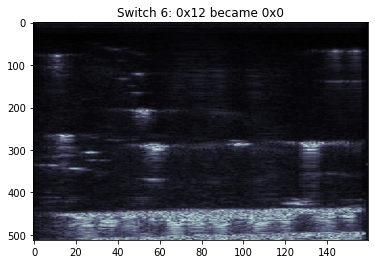

In [100]:
experiments = {}

experiments["default"] = {}
regs = [b'\x1b\x00',b'$\x01',b'&\x01',b'*\x01',b'\x18\x01',b'A\x01',b'\x12\x01']

loop = probe.getImages(2) 
experiments["default"]["loop"] = loop[0]
plt.imshow(np.sqrt(np.abs(loop[0])),cmap=plt.cm.bone, aspect='auto')
plt.title("Default")
plt.savefig("images/20210404/default.jpg")

for m in range(len(regs)):
    probe.readWrite(b'\x17\x01')
    for j in range(len(regs)):
        probe.readWrite(regs[j]); 
    k = regs[m]
    a = bytearray(k)
    if a[1]:
        a[1] = 0
    else:
        a[1] = 1
    kk = bytes(a)
    print(k,kk)
    probe.readWrite(kk); 
    experiments["Bools"+str(m)] = {}
    experiments["Bools"+str(m)][hex(k[0])] = hex(k[1])
    experiments["Bools"+str(m)]["table"] = CheckRegs(probe)
    loop = probe.getImages(2)
    experiments["Bools"+str(m)]["loop"] = loop[0]
    plt.imshow(np.sqrt(np.abs(loop[0])),cmap=plt.cm.bone, aspect='auto')
    
    plt.title("Switch "+str(m)+": "+str(hex(a[0]))+ " became "+str(hex(a[1])))
    plt.savefig("images/20210404/"+str(m)+".jpg")

b'\x1b\x00'
b'$\x01'
b'&\x01'
b'\x1b\x00'
b'$\x01'
b'&\x01'
b'\x1b\x00'
b'$\x01'
b'&\x01'
b'\x1b\x00'
b'$\x01'
b'&\x01'
b'\x1b\x00'
b'$\x01'
b'&\x01'
b'\x1b\x00'
b'$\x01'
b'&\x01'


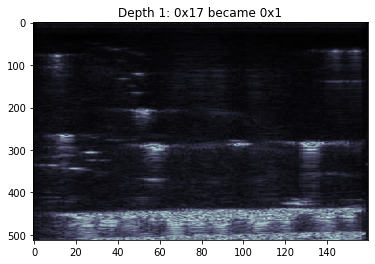

In [102]:
experiments = {}

experiments["default"] = {}
regs = [b'\x1b\x00',b'$\x01',b'&\x01',b'*\x01',b'\x18\x01',b'A\x01',b'\x12\x01']

Parcours = list(range(5)) + [1]
for m in Parcours:
    for j in range(3):
        probe.readWrite(regs[j]); 
        print(regs[j])
    for j in range(4):
        probe.readWrite(regs[3+j]);         
    a = bytearray(b'\x17\x01')
    a[1] = m
    kk = bytes(a)
    probe.readWrite(kk); 
    experiments["Depth"+str(m)] = {}

    loop = probe.getImages(2)
    experiments["Depth"+str(m)]["loop"] = loop[0]
    experiments["Depth"+str(m)][hex(k[0])] = hex(k[1])
    experiments["Depth"+str(m)]["table"] = CheckRegs(probe)
    plt.imshow(np.sqrt(np.abs(loop[0])),cmap=plt.cm.bone, aspect='auto')
    
    plt.title("Depth "+str(m)+": "+str(hex(a[0]))+ " became "+str(hex(a[1])))
    plt.savefig("images/20210404/Depth"+str(m)+".jpg")

In [103]:
np.savez("data/20210404_up20l.npz", experiments=experiments)